In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
qb_stats = pd.read_excel('NFL QB stats.xlsx', sheet_name = '2024')
qb_stats.head()

,RK,Name,Year,Team,POS,GP,CMP,ATT,CMP%,YDS,AVG,YDS/G,LNG,TD,INT,SACK,SYL,QBR,RTG
0,1,Joe BurrowCIN,2024,CIN,QB,17,460,652,70.6,4918,7.5,289.3,70,43,9,48,278,74.7,108.5
1,2,Jared GoffDET,2024,DET,QB,17,390,539,72.4,4629,8.6,272.3,82,37,12,31,234,68.4,111.8
2,3,Baker MayfieldTB,2024,TB,QB,17,407,570,71.4,4500,7.9,264.7,57,41,16,40,248,61.6,106.8
3,4,Geno SmithSEA,2024,SEA,QB,17,407,578,70.4,4320,7.5,254.1,71,21,15,50,338,53.8,93.2
4,5,Sam DarnoldMIN,2024,MIN,QB,17,361,545,66.2,4319,7.9,254.1,97,35,12,48,335,60.4,102.5


In [3]:
qb_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RK      50 non-null     int64  
 1   Name    50 non-null     object 
 2   Year    50 non-null     int64  
 3   Team    50 non-null     object 
 4   POS     50 non-null     object 
 5   GP      50 non-null     int64  
 6   CMP     50 non-null     int64  
 7   ATT     50 non-null     int64  
 8   CMP%    50 non-null     float64
 9   YDS     50 non-null     int64  
 10  AVG     50 non-null     float64
 11  YDS/G   50 non-null     float64
 12  LNG     50 non-null     int64  
 13  TD      50 non-null     int64  
 14  INT     50 non-null     int64  
 15  SACK    50 non-null     int64  
 16  SYL     50 non-null     int64  
 17  QBR     50 non-null     float64
 18  RTG     50 non-null     float64
dtypes: float64(5), int64(11), object(3)
memory usage: 7.6+ KB


In [4]:
qb_stats.columns.tolist()

['RK',
 'Name',
 'Year',
 'Team',
 'POS',
 'GP',
 'CMP',
 'ATT',
 'CMP%',
 'YDS',
 'AVG',
 'YDS/G',
 'LNG',
 'TD',
 'INT',
 'SACK',
 'SYL',
 'QBR',
 'RTG']

In [5]:
# cmp = pd.DataFrame({'Completion':qb_stats['CMP'],'Attempts':qb_stats['ATT']})
# cmp.head()

In [6]:
# new = pd.DataFrame({'Team Name':qb_stats['Team'],'Completion':qb_stats['CMP'],'Attempts':qb_stats['ATT'],'Completion Percentage':qb_stats['CMP%'],'Total Yards':qb_stats['YDS']})
# new

In [7]:
qb_stats.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RK,50.0,25.500,14.577380,1.0,13.250,25.50,37.750,50.0
Year,50.0,2024.000,0.000000,2024.0,2024.000,2024.00,2024.000,2024.0
GP,50.0,11.780,4.478019,2.0,8.000,11.50,17.000,17.0
CMP,50.0,225.160,118.101713,32.0,131.750,208.50,331.750,460.0
ATT,50.0,343.980,169.859424,44.0,228.000,322.00,498.750,652.0
CMP%,50.0,64.820,5.177502,47.7,63.025,65.30,67.350,77.3
YDS,50.0,2462.600,1344.122793,361.0,1370.250,2133.00,3754.250,4918.0
AVG,50.0,7.022,1.059705,3.7,6.450,7.05,7.700,10.2
YDS/G,50.0,195.808,52.658235,62.9,166.150,205.75,228.800,289.3
LNG,50.0,61.040,18.716968,25.0,47.000,63.00,71.000,98.0


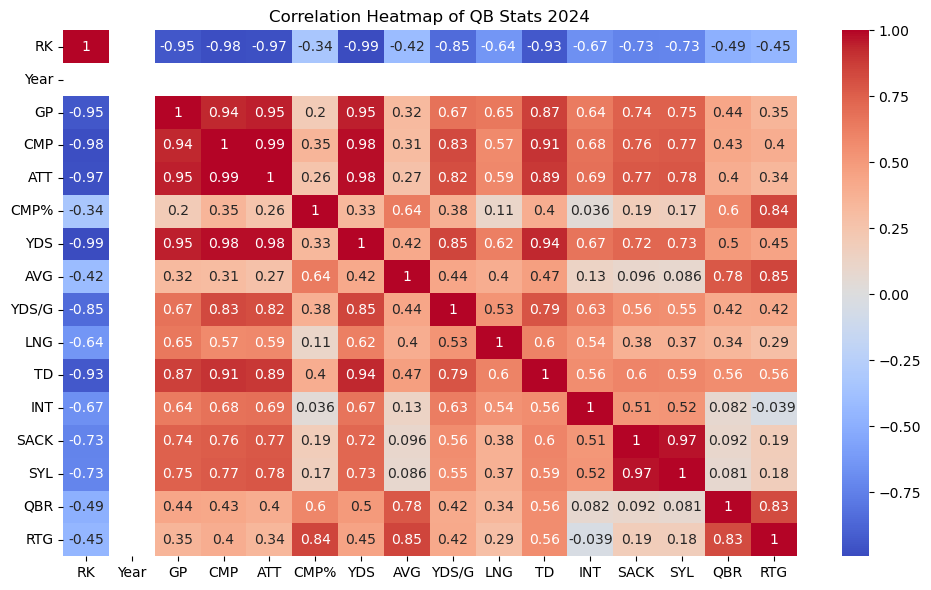

In [8]:
# this shows a correlation heatmap between the QBs stats for the year of 2024
correlation = qb_stats.corr(numeric_only = True)

plt.figure(figsize = (10,6))
matrix = sns.heatmap(correlation, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap of QB Stats 2024')
plt.tight_layout()

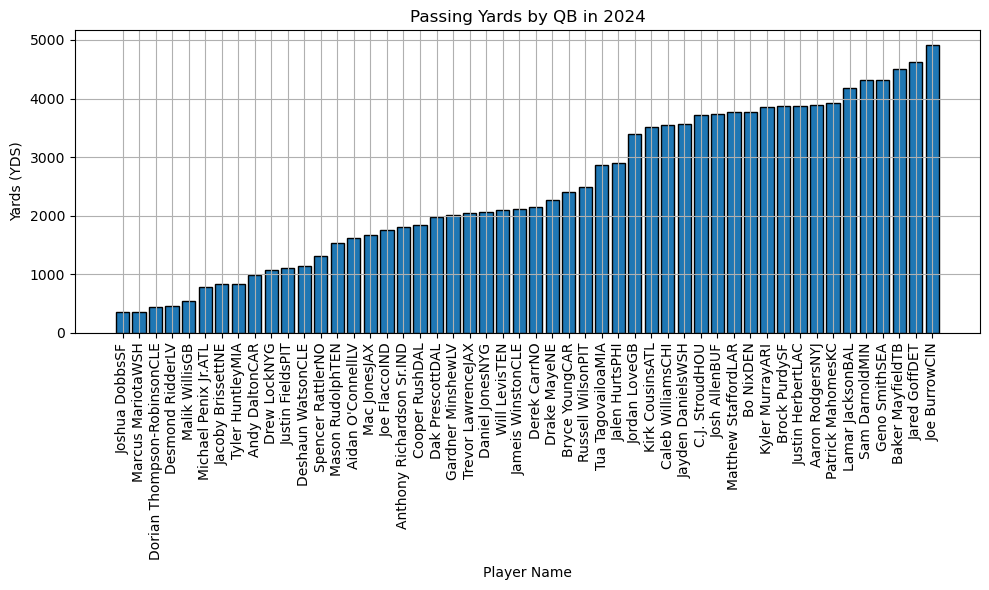

In [9]:
# Sort by yards (for better readability)
qb_stats_sorted = qb_stats.sort_values('YDS', ascending= True)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(qb_stats_sorted['Name'], qb_stats_sorted['YDS'], edgecolor='black')
plt.xlabel('Player Name')
plt.ylabel('Yards (YDS)')
plt.title('Passing Yards by QB in 2024')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

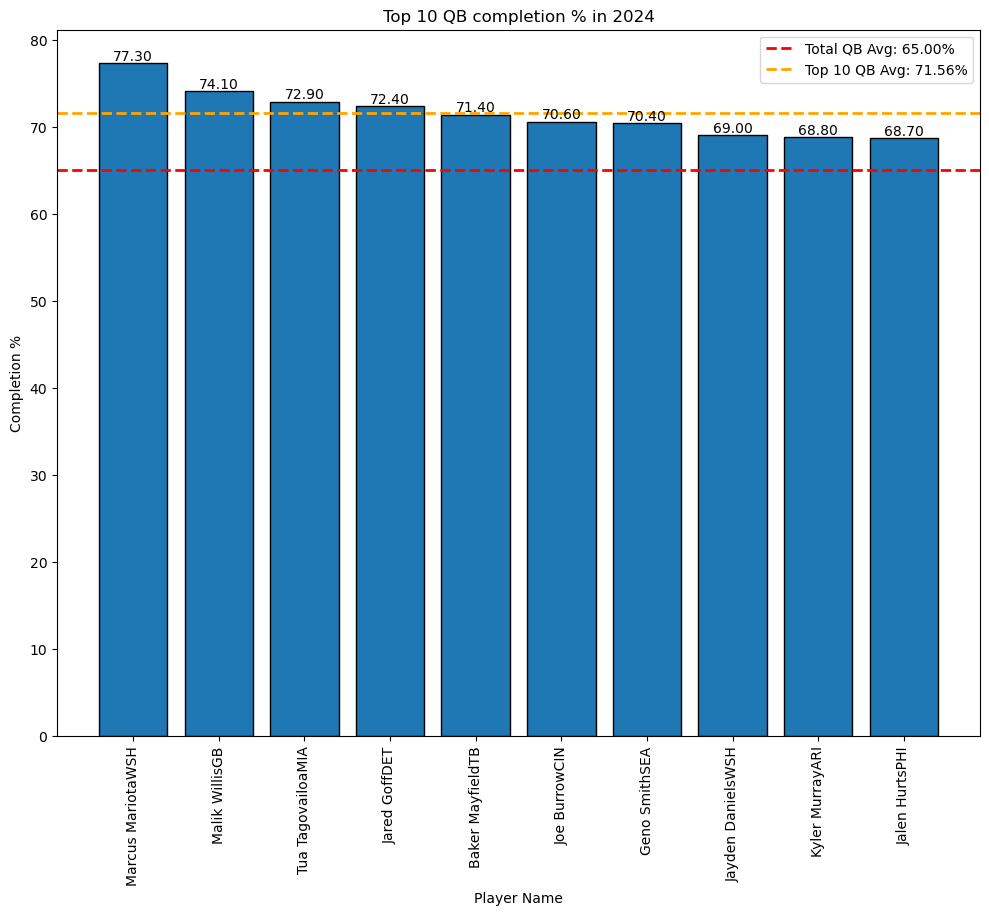

In [18]:
qb_sorted = qb_stats.sort_values('CMP%', ascending = False)

top_10 = qb_sorted.head(10)

plt.figure(figsize = (10,8))
bars = plt.bar(top_10['Name'],top_10['CMP%'], edgecolor = 'black')

for bar in bars:
    y = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

total_avgerage = qb_sorted['CMP%'].mean().round(2)
average = top_10['CMP%'].mean().round(2)
plt.axhline(total_average,color = 'red', linestyle = '--', linewidth = 2, label = f'Total QB Avg: {total_average:.2f}%')
plt.axhline(average, color='orange', linestyle='--', linewidth=2, label=f'Top 10 QB Avg: {average:.2f}%')
plt.legend()

plt.xlabel('Player Name')
plt.ylabel('Completion %')
plt.title('Top 10 QB completion % in 2024')
plt.tight_layout()
plt.xticks(rotation= 90)
plt.show()

In [16]:
# average completeion percentage for Top 10 QBs

average = top_10['CMP%'].mean().round(2)
average

71.56

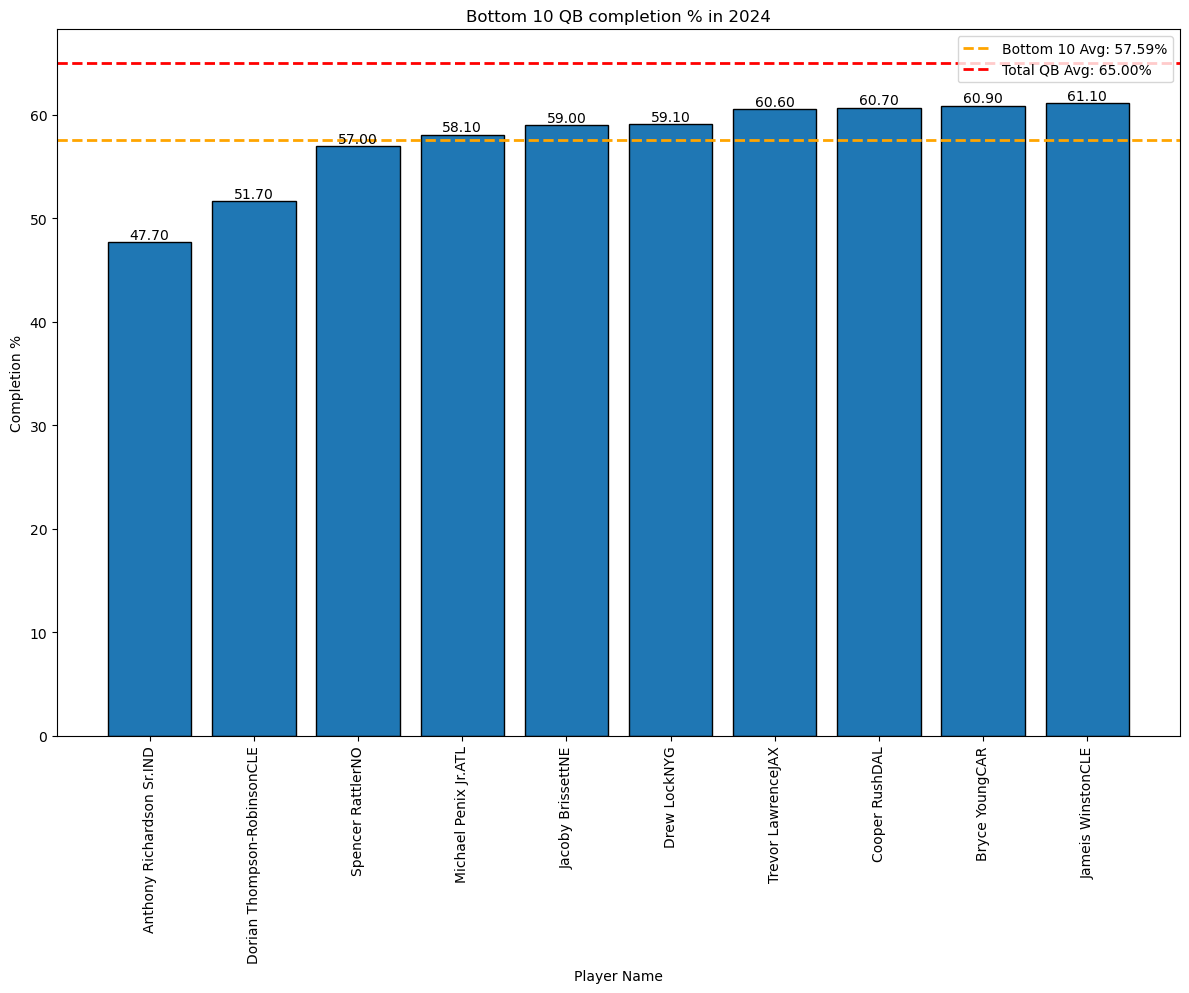

In [23]:
qb_sorted = qb_stats.sort_values('CMP%', ascending = True)

bottom_10 = qb_sorted.head(10)

plt.figure(figsize = (12,8))
bars = plt.bar(bottom_10['Name'],bottom_10['CMP%'], edgecolor = 'black')

for bar in bars:
    y = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

total_average = qb_sorted['CMP%'].mean().round()
average = bottom_10['CMP%'].mean().round(2)
plt.axhline(average, color='orange', linestyle='--', linewidth=2, label=f'Bottom 10 Avg: {average:.2f}%')
plt.axhline(total_average,color = 'red',linestyle = '--', linewidth = 2, label = f'Total QB Avg: {total_average:.2f}%' )
plt.legend()
    
plt.xlabel('Player Name')
plt.ylabel('Completion %')
plt.title('Bottom 10 QB completion % in 2024')
plt.tight_layout()
plt.xticks(rotation = 90)
plt.show()

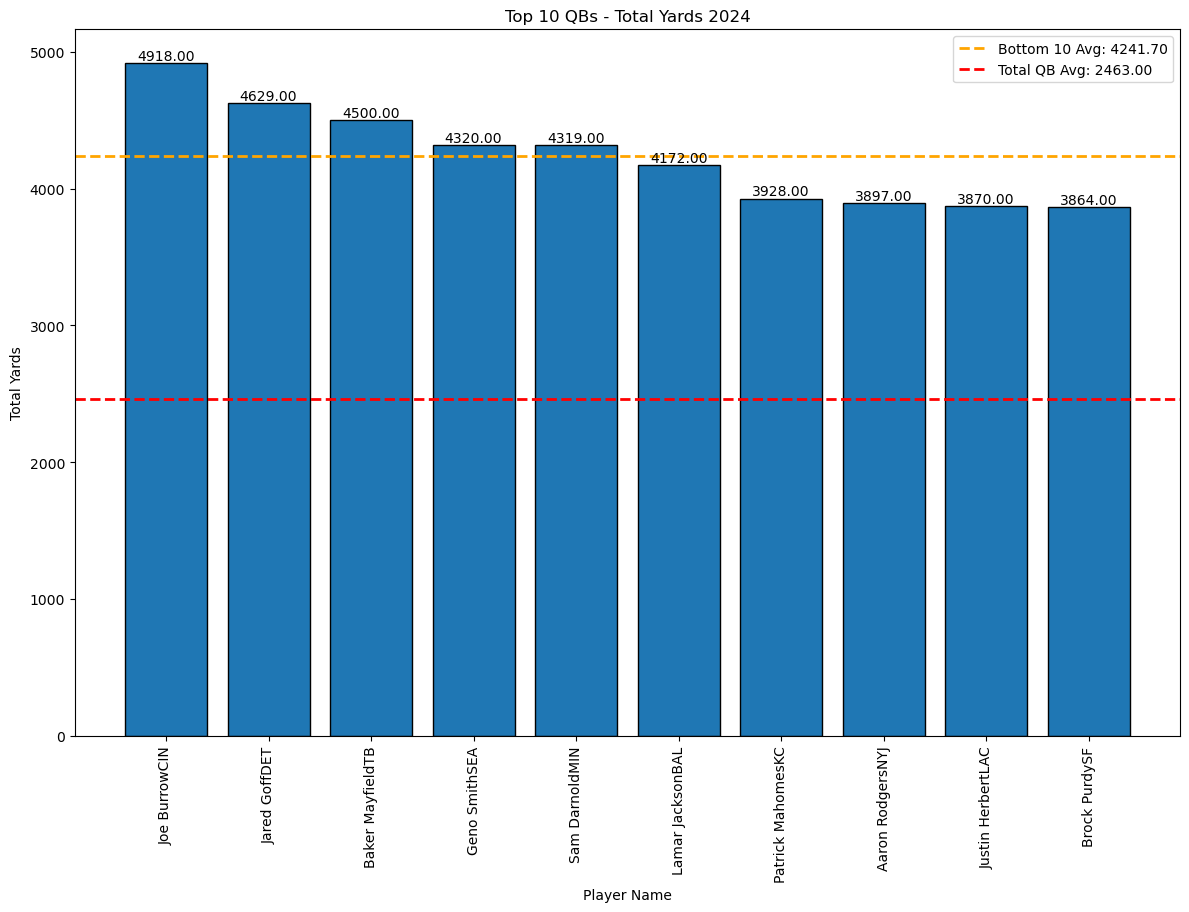

In [29]:
qb_sorted = qb_stats.sort_values('YDS', ascending = False)

top_10 = qb_sorted.head(10)

plt.figure(figsize = (12,8))
bars = plt.bar(top_10['Name'],top_10['YDS'], edgecolor = 'black')

for bar in bars:
    y = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

total_average = qb_sorted['YDS'].mean().round()
average = top_10['YDS'].mean().round(2)
plt.axhline(average, color='orange', linestyle='--', linewidth=2, label=f'Bottom 10 Avg: {average:.2f}')
plt.axhline(total_average,color = 'red',linestyle = '--', linewidth = 2, label = f'Total QB Avg: {total_average:.2f}' )
plt.legend()
    
plt.xlabel('Player Name')
plt.ylabel('Total Yards')
plt.title('Top 10 QBs - Total Yards 2024')
plt.tight_layout()
plt.xticks(rotation = 90)
plt.show()

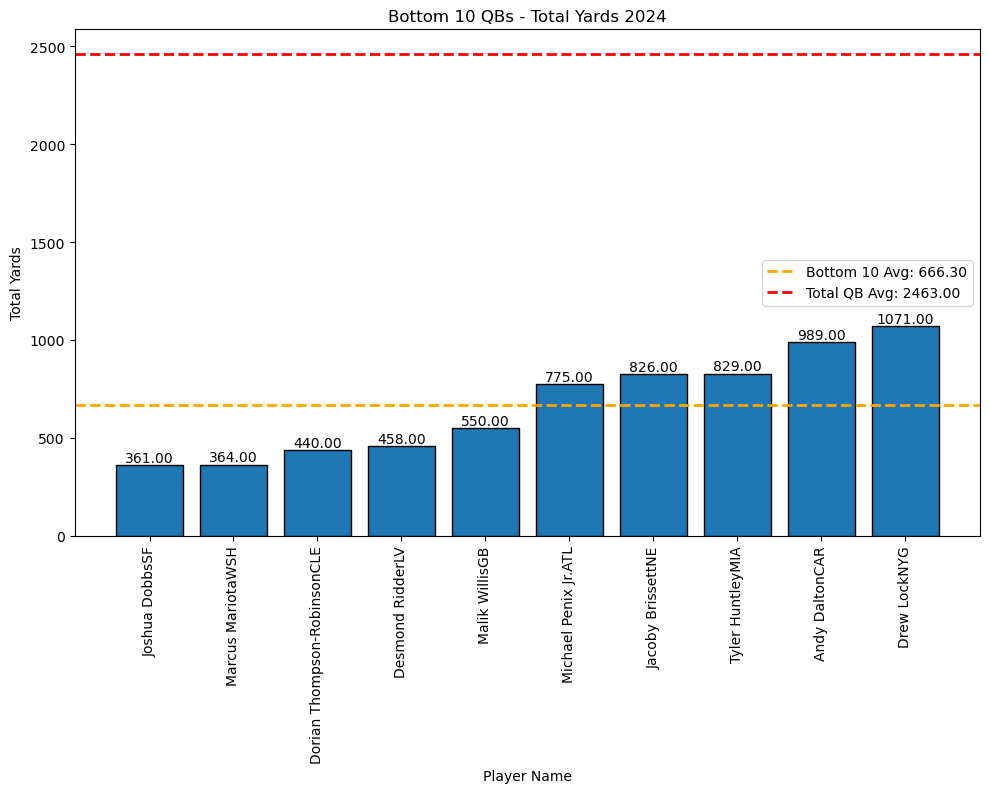

In [30]:
qb_sorted = qb_stats.sort_values('YDS', ascending = True)

bottom_10 = qb_sorted.head(10)

plt.figure(figsize = (10,6))
bars = plt.bar(bottom_10['Name'],bottom_10['YDS'], edgecolor = 'black')

for bar in bars:
    y = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

total_average = qb_sorted['YDS'].mean().round()
average = bottom_10['YDS'].mean().round(2)
plt.axhline(average, color='orange', linestyle='--', linewidth=2, label=f'Bottom 10 Avg: {average:.2f}')
plt.axhline(total_average,color = 'red',linestyle = '--', linewidth = 2, label = f'Total QB Avg: {total_average:.2f}' )
plt.legend()
    
plt.xlabel('Player Name')
plt.ylabel('Total Yards')
plt.title('Bottom 10 QBs - Total Yards 2024')
plt.tight_layout()
plt.xticks(rotation = 90)
plt.show()